In [1]:
#Pre-Processing
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [2]:
# Read CSV
df = pd.read_csv('CSV.csv')

In [3]:
# Show data
df['DiabetesSelfDecl']=df.Diabetes.replace({'Normal':0,'Diabetic':1})
df['DiabetesCalc']=df.Diabetes.replace({'Normal':0,'Prediabetic':1,'Diabetic':2})
df['Diabetes']=df.Diabetes.replace({'Normal':0,'Diabetic':1})
df.head(5)

,PatientId,Zone,State,District,Age,Gender,Waist,Height,Weight,DiabetesSelfDecl,...,BmiWcRiskScore,IdrsWaist,IdrsAge,IdrsFamilyHistory,IdrsBmi,IdrsBmiWc,IdrsPhysicalActivity,Idrs,IdrsWithBmi,IdrsWithBmiWc
0,0,W,Rajasthan,Ajmer,35,Female,70,157,47,0,...,1,0,20,0,0,0,30,50,50,50
1,1,E,Orissa,Balasore,38,Female,81,145,65,0,...,4,10,20,10,20,30,30,70,80,90
2,4,W,Rajasthan,Ajmer,42,Female,102,159,68,0,...,3,20,20,20,10,20,30,90,80,90
3,7,E,Orissa,Balasore,37,Female,76,142,44,0,...,1,0,20,10,0,0,30,60,60,60
4,8,E,Orissa,Balasore,47,Male,87,160,60,1,...,2,0,20,10,10,10,30,60,70,70


In [4]:
# Show columns
df.columns

Index(['PatientId', 'Zone', 'State', 'District', 'Age', 'Gender', 'Waist',
       'Height', 'Weight', 'DiabetesSelfDecl', 'Diafather', 'Diamother',
       'Moderate', 'Vigorous', 'Dailyphysical', 'Hba1c', 'DiabetesCalc',
       'Diabetes', 'ClinicalNotes', 'Bmi', 'WcRiskScore', 'BmiRiskScore',
       'BmiWcRiskScore', 'IdrsWaist', 'IdrsAge', 'IdrsFamilyHistory',
       'IdrsBmi', 'IdrsBmiWc', 'IdrsPhysicalActivity', 'Idrs', 'IdrsWithBmi',
       'IdrsWithBmiWc'],
      dtype='object')

In [20]:
# Smaller Dataframe
keep = ['Zone', 'State', 'District', 'Age', 'Gender', 'Waist',
'Height', 'Weight', 'DiabetesSelfDecl', 'Diafather', 'Diamother',
       'Moderate', 'Vigorous', 'Dailyphysical', 'Hba1c', 'DiabetesCalc',
       'Diabetes', 'ClinicalNotes', 'Bmi', 'WcRiskScore', 'BmiRiskScore',
       'BmiWcRiskScore', 'IdrsWaist', 'IdrsAge', 'IdrsFamilyHistory',
       'IdrsBmi', 'IdrsBmiWc', 'IdrsPhysicalActivity', 'Idrs', 'IdrsWithBmi',
       'IdrsWithBmiWc']
db = df[keep].dropna()
db.head(10)

,Zone,State,District,Age,Gender,Waist,Height,Weight,DiabetesSelfDecl,Diafather,...,BmiWcRiskScore,IdrsWaist,IdrsAge,IdrsFamilyHistory,IdrsBmi,IdrsBmiWc,IdrsPhysicalActivity,Idrs,IdrsWithBmi,IdrsWithBmiWc
0,W,Rajasthan,Ajmer,35,Female,70,157,47,0,0,...,1,0,20,0,0,0,30,50,50,50
1,E,Orissa,Balasore,38,Female,81,145,65,0,1,...,4,10,20,10,20,30,30,70,80,90
2,W,Rajasthan,Ajmer,42,Female,102,159,68,0,1,...,3,20,20,20,10,20,30,90,80,90
3,E,Orissa,Balasore,37,Female,76,142,44,0,1,...,1,0,20,10,0,0,30,60,60,60
4,E,Orissa,Balasore,47,Male,87,160,60,1,1,...,2,0,20,10,10,10,30,60,70,70
5,S,Karnataka,Bangalore,59,Female,83,158,57,0,0,...,2,10,30,0,0,10,30,70,60,70
6,E,Orissa,Balasore,30,Female,72,151,84,0,1,...,4,0,0,10,20,20,30,40,60,60
7,E,Orissa,Balasore,37,Female,81,151,60,0,1,...,3,10,20,10,10,20,30,70,70,80
8,E,Orissa,Balasore,32,Female,72,140,65,0,1,...,4,0,0,10,20,20,30,40,60,60
9,E,Orissa,Balasore,43,Male,81,140,65,1,0,...,4,0,20,10,20,20,30,60,80,80


In [6]:
# Linear Regression And Interpretation
# Only Weight Factor
model = sm.OLS.from_formula("Diabetes ~ Weight", data=db)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     37.62
Date:                Thu, 15 Apr 2021   Prob (F-statistic):           9.02e-10
Time:                        17:07:46   Log-Likelihood:                -5300.4
No. Observations:                7496   AIC:                         1.060e+04
Df Residuals:                    7494   BIC:                         1.062e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2227      0.031      7.142      0.000       0.162       0.284
Weight         0.0029      0.000      6.134      0.000       0.002       0.004
==============================================================================
Omnibus:                    28677.327   Durbin-Watson:                   0.936
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1230.304
Skew:                           0.360   Prob(JB):                    6.96e-268
Kurtosis:                       1.150   Cond. No.                         368.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
# Standar Deviation
db.Diabetes.std()

0.49200321032172295

In [8]:
#Correlation
cc=db[["Diabetes","Weight"]].corr()
cc

,Diabetes,Weight
Diabetes,1.000000,0.070678
Weight,0.070678,1.000000


In [9]:
# R-Squared Value
cc.Diabetes.Weight**2

0.004995439014038608

In [10]:
# Predicted Diabetes Value based on Factor
result.fittedvalues

0       0.357067
1       0.408533
2       0.417110
3       0.348490
4       0.394237
          ...   
7491    0.388518
7492    0.414251
7493    0.411392
7494    0.448562
7495    0.385659
Length: 7496, dtype: float64

In [21]:
# Linear Regression And Interpretation
# Age,Weight,Father And Mother Factor
model = sm.OLS.from_formula("Diabetes ~ Weight + DiabetesSelfDecl + Diafather + Diamother + Moderate + Vigorous + Dailyphysical + Hba1c + DiabetesCalc + Diabetes + ClinicalNotes + Bmi + WcRiskScore + BmiRiskScore + BmiWcRiskScore + IdrsWaist + IdrsAge + IdrsFamilyHistory + IdrsBmi + IdrsBmiWc + IdrsPhysicalActivity + Idrs + IdrsWithBmi + IdrsWithBmiWc", data=db)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.974e+30
Date:                Thu, 15 Apr 2021   Prob (F-statistic):               0.00
Time:                        17:13:43   Log-Likelihood:             2.3393e+05
No. Observations:                7496   AIC:                        -4.678e+05
Df Residuals:                    7475   BIC:                        -4.677e+05
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        7.633e-17   7.62e-16      0.100      0.920   -1.42e-15    1.57e-15
ClinicalNotes[T.KnownDiaDia]        0.0400   2.35e-16    1.7e+14      0.000       0.040       0.040
ClinicalNotes[T.KnownDiaNormal]     0.0400   3.01e-16   1.33e+14      0.000       0.040       0.040
ClinicalNotes[T.KnownDiaPreDia]     0.0400   3.11e-16   1.28e+14      0.000       0.040       0.040
ClinicalNotes[T.NewDia]             0.0400   2.25e-16   1.78e+14      0.000       0.040       0.040
ClinicalNotes[T.NewPreDia]      -8.153e-17   2.35e-16     -0.347      0.729   -5.42e-16    3.79e-16
Weight                           5.551e-17      1e-17      5.536      0.000    3.59e-17    7.52e-17
DiabetesSelfDecl                    0.1600   3.85e-17   4.15e+15      0.000       0.160       0.160
Diafather                        2.515e-16   1.71e-16      1.475      0.140   -8.28e-17    5.86e-16
Diamother                       -4.597e-16   1.71e-16     -2.694      0.007   -7.94e-16   -1.25e-16
Moderate                        -6.679e-17   5.16e-17     -1.294      0.196   -1.68e-16    3.44e-17
Vigorous                        -1.388e-17   5.33e-17     -0.260      0.795   -1.18e-16    9.07e-17
Dailyphysical                    1.366e-17   6.79e-17      0.201      0.841   -1.19e-16    1.47e-16
Hba1c                            1.501e-16   7.23e-17      2.077      0.038    8.41e-18    2.92e-16
DiabetesCalc                        0.3200   7.71e-17   4.15e+15      0.000       0.320       0.320
Diabetes                            0.1600   3.85e-17   4.15e+15      0.000       0.160       0.160
Bmi                               3.86e-17   4.85e-17      0.797      0.426   -5.64e-17    1.34e-16
WcRiskScore                      1.735e-17   2.26e-16      0.077      0.939   -4.26e-16     4.6e-16
BmiRiskScore                    -9.194e-17   4.44e-16     -0.207      0.836   -9.62e-16    7.78e-16
BmiWcRiskScore                  -2.776e-16   4.06e-16     -0.684      0.494   -1.07e-15    5.17e-16
IdrsWaist                       -6.288e-17   2.21e-17     -2.846      0.004   -1.06e-16   -1.96e-17
IdrsAge                          1.171e-15   1.02e-17    115.058      0.000    1.15e-15    1.19e-15
IdrsFamilyHistory                1.243e-15    1.3e-17     95.406      0.000    1.22e-15    1.27e-15
IdrsBmi                          7.781e-16   2.54e-17     30.620      0.000    7.28e-16    8.28e-16
IdrsBmiWc                        4.205e-16   2.78e-17     15.122      0.000    3.66e-16    4.75e-16
IdrsPhysicalActivity             1.114e-15   1.72e-17     64.894      0.000    1.08e-15    1.15e-15
Idrs                             7.356e-17   1.44e-17      5.114      0.000    4.54e-17    1.02e-16
IdrsWithBmi                     -8.257e-16   2.36e-17    -34.915      0.000   -8.72

In [22]:
# Standar Deviation
db.Diabetes.std()

0.49200321032172295

In [23]:
# Correlation
cc=db[["Diabetes","Age","Weight","Diafather","Diamother"]].corr()
cc

,Diabetes,Age,Weight,Diafather,Diamother
Diabetes,1.000000,0.274992,0.070678,0.150129,0.170416
Age,0.274992,1.000000,0.029695,-0.071670,-0.019343
Weight,0.070678,0.029695,1.000000,0.050173,0.084011
Diafather,0.150129,-0.071670,0.050173,1.000000,0.212706
Diamother,0.170416,-0.019343,0.084011,0.212706,1.000000


In [24]:
# # R-Squared Value
# cc.Diabetes.Weight**2

In [25]:
# Predicted Diabetes Value based on Factor
result.fittedvalues

0       5.178660e-15
1       8.304462e-15
2       9.557087e-15
3       6.601588e-15
4       1.000000e+00
            ...     
7491    1.000000e+00
7492    1.000000e+00
7493    1.000000e+00
7494    1.000000e+00
7495    1.000000e+00
Length: 7496, dtype: float64

In [26]:
# Visualization

In [27]:
from statsmodels.sandbox.predict_functional import predict_functional
values = {"Diafather": 0, "Diamother": 0}
pr, cb, fv = predict_functional(result, "Weight",values=values, ci_method="simultaneous")
#Here, pr is the predicted values(pr), cb is the confidence band and 
#the fv is the function values
ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Weight")
_ = ax.set_ylabel("Diabetes")

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\statsmodels\sandbox\predict_functional.py:169: ValueWarning: 'IdrsPhysicalActivity', 'Waist', 'District', 'Moderate', 'WcRiskScore', 'Age', 'Height', 'Dailyphysical', 'State', 'Hba1c', 'IdrsWithBmiWc', 'BmiRiskScore', 'BmiWcRiskScore', 'IdrsFamilyHistory', 'Bmi', 'DiabetesSelfDecl', 'Idrs', 'Zone', 'Vigorous', 'ClinicalNotes', 'Gender', 'IdrsWithBmi', 'IdrsAge', 'IdrsBmiWc', 'DiabetesCalc', 'IdrsWaist', 'IdrsBmi' in data frame but not in summaries or values.
  warnings.warn("%s in data frame but not in summaries or values."


PatsyError: Error evaluating factor: NameError: name 'DiabetesSelfDecl' is not defined
    Diabetes ~ Weight + DiabetesSelfDecl + Diafather + Diamother + Moderate + Vigorous + Dailyphysical + Hba1c + DiabetesCalc + Diabetes + ClinicalNotes + Bmi + WcRiskScore + BmiRiskScore + BmiWcRiskScore + IdrsWaist + IdrsAge + IdrsFamilyHistory + IdrsBmi + IdrsBmiWc + IdrsPhysicalActivity + Idrs + IdrsWithBmi + IdrsWithBmiWc
                        ^^^^^^^^^^^^^^^^

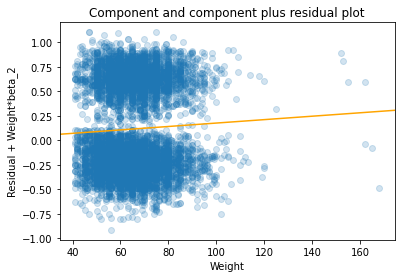

In [18]:
from statsmodels.graphics.regressionplots import plot_ccpr
ax = plt.axes()
plot_ccpr(result, "Weight", ax)
ax.lines[0].set_alpha(0.2) 
# Reduce overplotting with transparency
_ = ax.lines[1].set_color('orange')